# 统计图像尺寸、比例分布

同济子豪兄 https://space.bilibili.com/1900783

2022-8-1

## 导入工具包

In [2]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

## 指定数据集路径

In [3]:
# 指定数据集路径
dataset_path = 'D:\\dataset\\c100'
os.chdir(dataset_path)
os.listdir()

['云',
 '仓鼠',
 '兔子',
 '兰花',
 '割草机',
 '向日葵',
 '城堡',
 '大海',
 '大象',
 '女人',
 '女孩',
 '小婴儿',
 '山',
 '巴士',
 '平原',
 '床',
 '恐龙',
 '房屋',
 '拖拉机',
 '摩天大楼',
 '摩托车',
 '时钟',
 '有轨电车',
 '杯子',
 '松树',
 '松鼠',
 '枫树',
 '柳树',
 '桌子',
 '桥',
 '梨',
 '棕榈树',
 '森林',
 '椅子',
 '橘子',
 '橡树',
 '比目鱼',
 '毛虫',
 '水族馆鱼类',
 '水濑',
 '沙发',
 '浣熊',
 '海狸',
 '海豚',
 '海豹',
 '海龟',
 '火箭',
 '火车',
 '灯',
 '熊',
 '牛',
 '狐狸',
 '狮子',
 '狼',
 '玫瑰',
 '瓶子',
 '甜椒',
 '甲虫',
 '电视',
 '电话',
 '男人',
 '男孩',
 '皮卡',
 '盘子',
 '碗',
 '箱子',
 '罂粟',
 '老虎',
 '老鼠',
 '自行车',
 '臭鼬',
 '苹果',
 '蘑菇',
 '蛇',
 '蜗牛',
 '蜘蛛',
 '蜜蜂',
 '蜥蜴',
 '蝴蝶',
 '螃蟹',
 '蟑螂',
 '蠕虫',
 '衣柜',
 '袋鼠',
 '豪猪',
 '豹',
 '负鼠',
 '郁金香',
 '金属罐',
 '键盘',
 '马路',
 '骆驼',
 '鲨鱼',
 '鲸鱼',
 '鳄鱼',
 '鳐',
 '鳟鱼',
 '黑猩猩',
 '鼩鼱',
 '龙虾']

In [5]:
import PIL.Image as Image
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = Image.open(file).convert('RGB')
            # img = cv2.imread(file)
            df = df._append({'类别':fruit, '文件名':file, '图像宽':img.size[1], '图像高':img.size[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

  3%|▎         | 3/100 [00:08<04:39,  2.88s/it]C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 16%|█▌        | 16/100 [00:53<05:06,  3.65s/it]C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 24%|██▍       | 24/100 [01:22<04:17,  3.38s/it]C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 34%|███▍      | 34/100 [01:55<03:40,  3.35s/it]C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\

蟑螂\370.jpg 读取错误


 88%|████████▊ | 88/100 [04:56<00:39,  3.32s/it]C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 97%|█████████▋| 97/100 [05:25<00:09,  3.21s/it]C:\Users\POLARIS\.conda\envs\nsuai\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 100/100 [05:37<00:00,  3.37s/it]


## 可视化图像尺寸分布

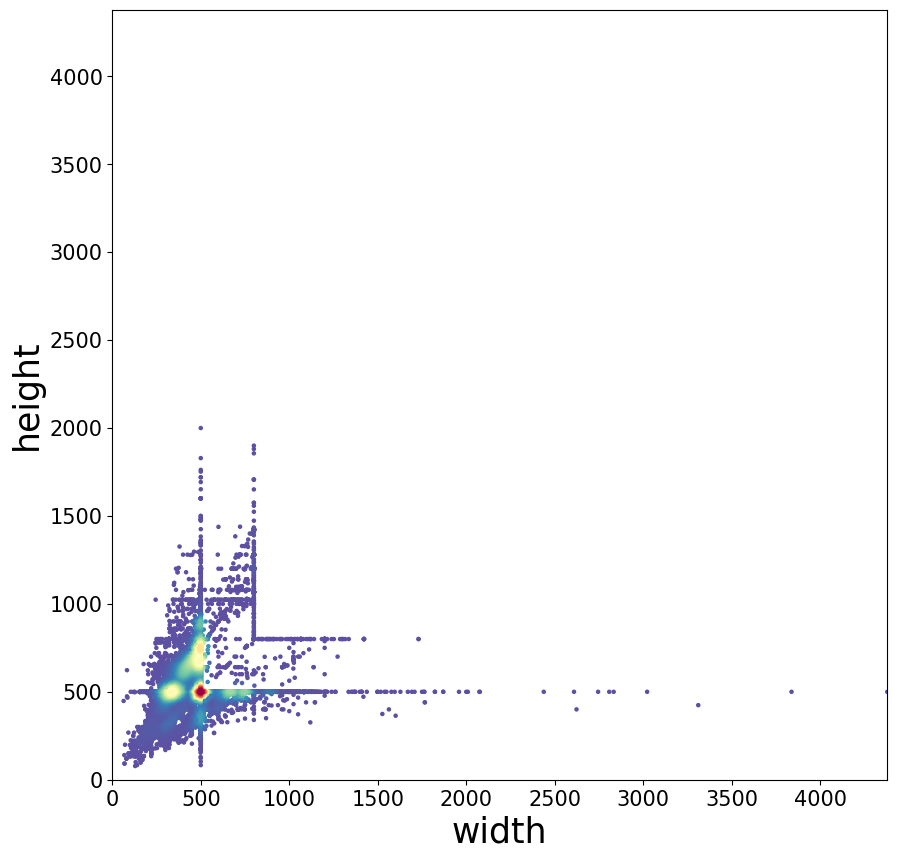

In [8]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=xy_max)
plt.ylim(ymin=0, ymax=xy_max)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()